<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-и-общей-информации" data-toc-modified-id="Изучение-данных-и-общей-информации-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных и общей информации</a></span></li><li><span><a href="#Топ-10-городов-по-количеству-рейсов" data-toc-modified-id="Топ-10-городов-по-количеству-рейсов-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Топ 10 городов по количеству рейсов</a></span></li><li><span><a href="#График-среднего-количества-рейсов-для-каждого-города" data-toc-modified-id="График-среднего-количества-рейсов-для-каждого-города-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>График среднего количества рейсов для каждого города</a></span></li><li><span><a href="#График-количества-рейсов-каждой-модели-самолета" data-toc-modified-id="График-количества-рейсов-каждой-модели-самолета-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>График количества рейсов каждой модели самолета</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Анализ внутренних пассажирских авиаперевозок компании F9

## Изучение данных и общей информации

«F9» — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. Сотни перелётов каждый день. Нужно понять предпочтения пользователей, покупающих билеты на те или иные направления.
Необходимо изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.

* model — модели самолета;
* flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года;

* city — города;
* average_flights — среднее количество рейсов, прибывающих в город city за день в августе 2018 года.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
pd.options.display.max_columns = None
# sns.set_style("darkgrid")

In [3]:
df1 = pd.read_csv('query_1.csv')
df3 = pd.read_csv('query_3.csv')

In [4]:
df1.info()
df1.head(8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [5]:
df3.info()
df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


In [6]:
df1.isna().sum()

model             0
flights_amount    0
dtype: int64

In [7]:
df3.isna().sum()

city               0
average_flights    0
dtype: int64

In [8]:
df1['model'].value_counts()

Sukhoi SuperJet-100    1
Airbus A319-100        1
Airbus A321-200        1
Cessna 208 Caravan     1
Boeing 767-300         1
Bombardier CRJ-200     1
Boeing 737-300         1
Boeing 777-300         1
Name: model, dtype: int64

In [9]:
df3['city'].value_counts()

Абакан            1
Урай              1
Мирный            1
Южно-Сахалинск    1
Удачный           1
                 ..
Ярославль         1
Владикавказ       1
Чита              1
Курган            1
Самара            1
Name: city, Length: 101, dtype: int64

Изучили общие данные о двух таблицах df1 и df3.

С данным все в порядке, нет пропущенных значений, дубликатов, типы данных соответсвуют своему содержанию. Можно продолжать анализ данных.

## Топ 10 городов по количеству рейсов

In [10]:
df3.sort_values(by='average_flights',ascending=False).head(10)

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


Text(0, 0.5, 'Город')

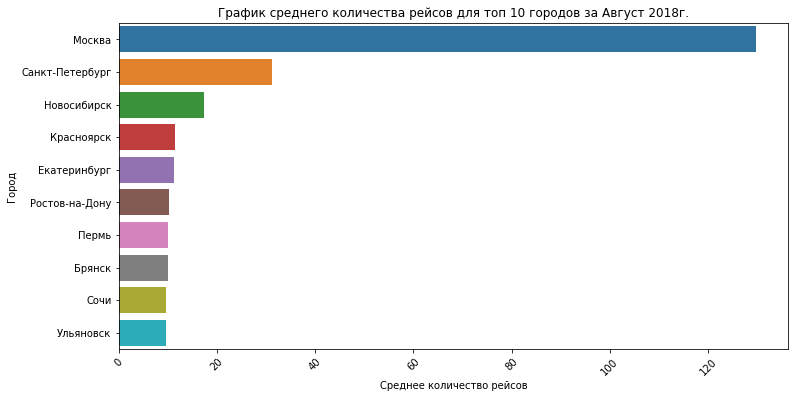

In [11]:
top10 = df3.query('average_flights>=9.580645').sort_values(by='average_flights',ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=top10, x='average_flights', y='city')
plt.xticks(rotation=45)
plt.title("График среднего количества рейсов для топ 10 городов за Август 2018г.")
plt.xlabel("Среднее количество рейсов")
plt.ylabel("Город")

Вывели таблицу и построили график с топ 10 городами по среднему количеству рейсов. 

Лидером является Москва(129.77), так как это самый крупный город России и через него происходит огромное количество пересадок. 

На 2 месте Санкт-Петербург(31.16), также крупный город и культурная столица России, большой туристический поток. 

3 место Новосибирск(17.32) самый крупный город в СФО. 

4 и 5 место Красноярск(11.58) и Екатеринбург(11.32). 

## График среднего количества рейсов для каждого города

Text(0, 0.5, 'Город')

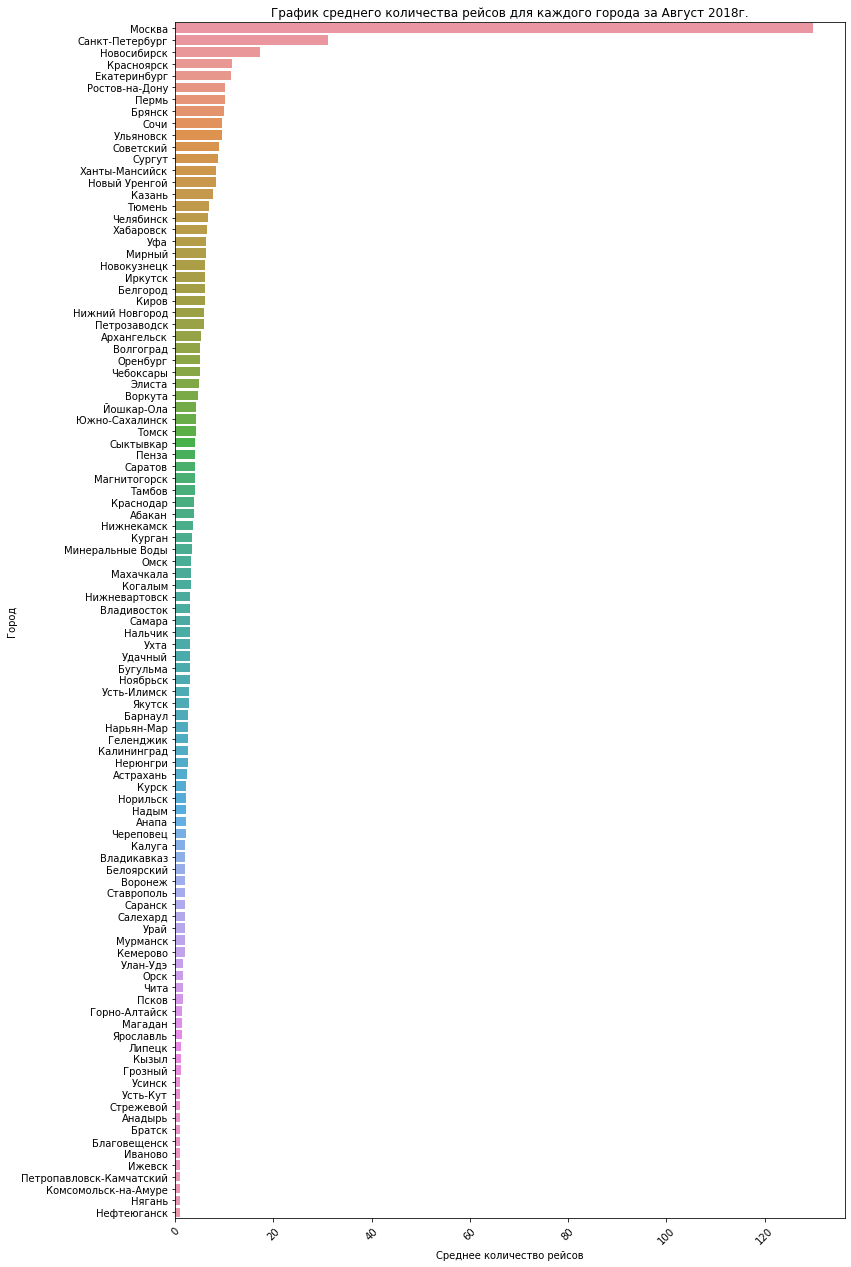

In [12]:
df3 = df3.sort_values(by='average_flights',ascending=False)
plt.figure(figsize=(12, 22))
sns.barplot(data=df3, x='average_flights', y='city')
plt.xticks(rotation=45)
plt.title("График среднего количества рейсов для каждого города за Август 2018г.")
plt.xlabel("Среднее количество рейсов")
plt.ylabel("Город")

Большее количество перелетов у крупных городов, и которые являются столицами федеральных округов. Меньше всего перелетов у городов с маленьким количеством жителей и также у тех, которые приравнены к районам крайнего севера.

## График количества рейсов каждой модели самолета

In [13]:
df1=df1.sort_values(by='flights_amount',ascending=False).head(10)
df1

,model,flights_amount
6,Cessna 208 Caravan,4557
5,Bombardier CRJ-200,4446
7,Sukhoi SuperJet-100,4185
1,Airbus A321-200,960
2,Boeing 737-300,630
0,Airbus A319-100,607
3,Boeing 767-300,600
4,Boeing 777-300,300


Text(0, 0.5, 'Количество рейсов')

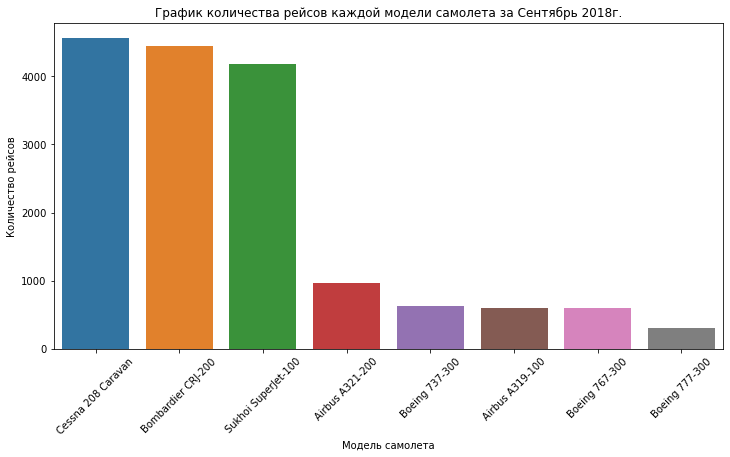

In [14]:
plt.figure(figsize=(12,6))
sns.barplot(data=df1, x='model', y='flights_amount')
plt.xticks(rotation=45)
plt.title("График количества рейсов каждой модели самолета за Сентябрь 2018г.")
plt.xlabel("Модель самолета")
plt.ylabel("Количество рейсов")

Самое большое количество рейсов у самолетов:

    * Cessna 208 Caravan - 4557
    * Bombardier CRJ-200 - 4446
    * Sukhoi SuperJet-100 - 4185
    
Лидером является **Cessna 208 Caravan**, потому что данный самолет предназначен для полетов на небольшие расстояния, вместительность самолета 9 человек. 
Затем идет **Bombardier CRJ-200** предназначен для полетов на средние расстояния, вместимость 50-52 человека. 
На третьем месте **Sukhoi SuperJet-100**, предназначен для полетов с дальностью выше средней и вместимостью 98 человек. 

Так как эти самолеты маленькие, и вмещают в себя относительно немного людей они совершают самое большое количество рейсов. 

Остальные же модели самолетов предназначены для полетов на большие расстояния, и вмещают в себя более 100 человек. Поэтому они соврешают намного меньше перелетов.

## Общий вывод

Изучив все данные и построив графики выяснили, что больше всего рейсов в крупных городах. Лидерами являются **Москва и Санк-Петербург.**

| Города     | Среднее количество рейсов |
| ------------- |:--------------------:| 
|Москва	|129.774194|
|Санкт-Петербург|	31.161290|
|Новосибирск	|17.322581|
|Красноярск|	11.580645|
|Екатеринбург|	11.322581|
|Ростов-на-Дону	|10.193548|
|Пермь	|10.129032|
|Брянск	|10.000000|
|Сочи	|9.612903|
|Ульяновск|	9.580645|

Также посмотрели количество рейсов для каждой модели самолета. Чаще всего используются самолеты **Cessna 208 Caravan, Bombardier CRJ-200, Sukhoi SuperJet-100.**

| Модель   | Количество рейсов |
| ------------- |:--------------------:| 
|Cessna 208 Caravan	|4557|
|Bombardier CRJ-200	|4446|
|Sukhoi SuperJet-100	|4185|
|Airbus A321-200	|960|
|Boeing 737-300	|630|
|Airbus A319-100	|607|
|Boeing 767-300|	600||
|Boeing 777-300	|300|